In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

!pip install xgboost

In [16]:
train = pd.read_csv("./optiver-trading-at-the-close/train.csv")
revealed = pd.read_csv('./optiver-trading-at-the-close/example_test_files/revealed_targets.csv')
test = pd.read_csv('./optiver-trading-at-the-close/example_test_files/test.csv')
sample_submission = pd.read_csv('./optiver-trading-at-the-close/example_test_files/sample_submission.csv')

In [21]:
train.head()
train.fillna(0, inplace=True)
train = train[train.columns.drop(list(train.filter(regex='_id')))]
X = train.drop(columns=['target'])
y = train['target']

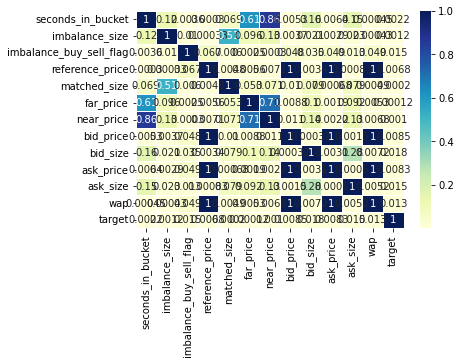

In [22]:
import matplotlib.pyplot as plt
import seaborn as sb

def correlation(dataframe):
    dataframe = dataframe[dataframe.columns.drop(list(dataframe.filter(regex='_id')))]
    corr = dataframe.corr()
    dataplot = sb.heatmap(corr.abs(), cmap='YlGnBu', annot=True, linewidths=.5)
    plt.show()

correlation(train)

(array([0.05569031, 0.05453516, 0.07842404, 0.07212309, 0.07048588,
        0.05760683, 0.06236156, 0.08250796, 0.15165633, 0.0756211 ,
        0.1645925 , 0.07439523], dtype=float32),
 0.04904158572267603)

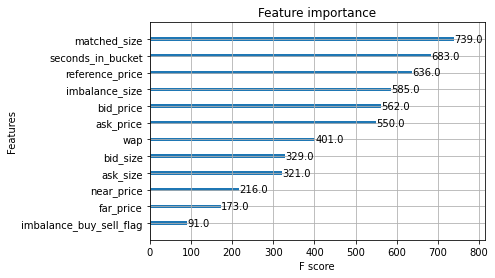

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost

def determine_predictors(df):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    regressor = XGBRegressor(predictor='gpu_predictor', gpu_id=0, verbosity=0, random_state=42, label=train['target'], feature_names= train.columns)
    regressor.fit(X_train, y_train)
    
    xgboost.plot_importance(regressor.get_booster())

    return (regressor.feature_importances_, regressor.score(X_test, y_test))

determine_predictors(train)

In [6]:
def feature_engineering(dataframe):
    columns = dataframe.drop(columns=['row_id', 'time_id']).columns
    